*Replace this text with your own name and a brief description of what this notebook does.*

## Homework 12-1

This assignment will use the dataset from Lab 12, which was 311 service requests from October 1 and 2, 2023.

Write a piece of code that plots overlapping histograms of the hours at which calls come in about rodents and the hours at which calls come in about commercial noise.  Your plot should have a title, x and y axis labels, and a legend.

##### Hint:
Rodent complaints have `Rodent` in the `Complaint Type` column, while commerical noise complaints have `Noise - Commercial` in the `Complaint Type` column.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option("display.max_columns",None)

calls = pd.read_csv("../../data/Oct1_2_2023_311_Service_Requests.csv",parse_dates=["Created Date"])
calls.head()

/var/folders/p6/884gpym57tdfgwg5495v1wqw0000gp/T/ipykernel_10824/1825581420.py:6: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  calls = pd.read_csv("../../data/Oct1_2_2023_311_Service_Requests.csv",parse_dates=["Created Date"])


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,58987955,2023-10-02 23:59:56,10/03/2023 01:01:46 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11420.0,120-01 111 AVENUE,111 AVENUE,120 STREET,121 STREET,120 STREET,121 STREET,ADDRESS,SOUTH OZONE PARK,111 AVENUE,NaN,Closed,NaN,The Police Department responded and upon arriv...,10/03/2023 01:01:51 AM,10 QUEENS,4.116010e+09,QUEENS,1034087.0,187362.0,ONLINE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.680802,-73.820317,"(40.68080187760374, -73.82031686786587)",24016.0,62.0,3.0,46.0,64.0
1,58993955,2023-10-02 23:59:34,10/03/2023 12:44:23 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10453.0,64 EAST 183 STREET,EAST 183 STREET,WALTON AVENUE,MORRIS AVENUE,WALTON AVENUE,MORRIS AVENUE,ADDRESS,BRONX,EAST 183 STREET,NaN,Closed,NaN,The Police Department responded to the complai...,10/03/2023 12:44:31 AM,05 BRONX,2.031820e+09,BRONX,1011231.0,251984.0,ONLINE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.858271,-73.902463,"(40.858271448590614, -73.90246273872681)",11606.0,6.0,5.0,29.0,29.0
2,58989586,2023-10-02 23:59:29,10/03/2023 12:42:19 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11224.0,2832 WEST 23 STREET,WEST 23 STREET,NEPTUNE AVENUE,MERMAID AVENUE,NEPTUNE AVENUE,MERMAID AVENUE,ADDRESS,BROOKLYN,WEST 23 STREET,NaN,Closed,NaN,The Police Department responded to the complai...,10/03/2023 12:42:26 AM,13 BROOKLYN,3.070150e+09,BROOKLYN,986923.0,149719.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.577620,-73.990378,"(40.577619686746154, -73.99037761720334)",18184.0,21.0,2.0,45.0,35.0
3,58991785,2023-10-02 23:59:19,10/03/2023 02:21:36 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,10473.0,917 OLMSTEAD AVENUE,OLMSTEAD AVENUE,STORY AVENUE,QUIMBY AVENUE,STORY AVENUE,QUIMBY AVENUE,ADDRESS,BRONX,OLMSTEAD AVENUE,NaN,Closed,NaN,The Police Department responded to the complai...,10/03/2023 02:21:44 AM,09 BRONX,2.036810e+09,BRONX,1025018.0,240042.0,ONLINE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.825441,-73.852695,"(40.82544129204551, -73.85269492494044)",11611.0,58.0,5.0,31.0,26.0
4,58996045,2023-10-02 23:59:05,10/03/2023 12:19:57 AM,NYPD,New York City Police Department,Animal-Abuse,Neglected,Residential Building/House,10459.0,1355 INTERVALE AVENUE,INTERVALE AVENUE,FREEMAN STREET,LOUIS NINE BOULEVARD,FREEMAN STREET,LOUIS NINE BOULEVARD,ADDRESS,BRONX,INTERVALE AVENUE,NaN,Closed,NaN,The Police Department responded to the complai...,10/03/2023 12:20:00 AM,03 BRONX,2.029650e+09,BRONX,1013857.0,242168.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.831321,-73.893013,"(40.83132101295457, -73.89301300550952)",10937.0,34.0,5.0,43.0,25.0


In [2]:
# create a dataframe of only rodent complaints
rodent_filter = calls["Complaint Type"] == "Rodent"
rodent_calls = calls[rodent_filter]

In [3]:
# create a dataframe of only commercial noise complaints
comm_noise_filter = calls["Complaint Type"] == "Noise - Commercial"
comm_noise_calls = calls[comm_noise_filter]

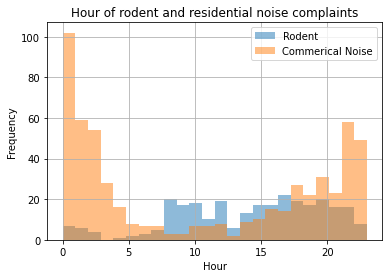

In [4]:
# create the two histograms
rodent_calls["Created Date"].dt.hour.hist(bins = 24, alpha = 0.5,)
comm_noise_calls["Created Date"].dt.hour.hist(bins = 24, alpha = 0.5)
plt.title("Hour of rodent and residential noise complaints")
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.legend(["Rodent","Commerical Noise"])

1. How do the two histograms differ?  Guess why this might be the case.
2. What happens if you add `density = True` as a parameter to both histograms?  Why?

Write your answers below.

1. Most of the commercial noise complaints are in the evening or early morning, while most of the rodent complaints are during the day.  The commerical noise complaints could be about about noise from restaurants, or perhaps trucks loading and unloading, that is annoying people or preventing them from sleeping.  In contrast, people need to be awake and doing things to see rodents, so most of those complaints are during the day.   

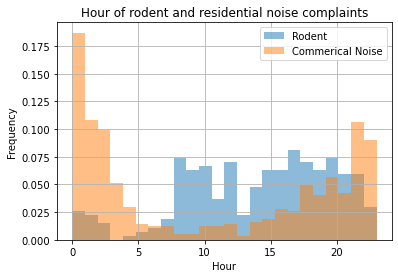

In [5]:
# create the two histograms
rodent_calls["Created Date"].dt.hour.hist(bins = 24, alpha = 0.5, density = True)
comm_noise_calls["Created Date"].dt.hour.hist(bins = 24, alpha = 0.5, density = True)
plt.title("Hour of rodent and residential noise complaints")
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.legend(["Rodent","Commerical Noise"])

2.Using the `density = True` normalizes the y axis (all frequency counts are divided by the total number of counts for the corresponding dataset).  In this new histogram, the rodents complaints take up a bigger area than in the previous one.  The orange and blue areas are now the same size (this is what normalization does by definition).  It's now easier to see that the majority of rodent complaints are during the day, while the majority of commercial noise complsins are in the evening, night, or early morning.